<a href="https://colab.research.google.com/github/Chaitanya-kumar55/Text_to_Image_generation_with_LLM_with_hugging_face/blob/main/Text_to_Image_generation_with_LLM_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text-to-Image Generation using Stable Diffusion and Diffusers



In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [3]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt = """A Golden Retriever, approximately 3 years old, with a thick, golden coat, playfully chases a bright red ball down a sun-drenched cobblestone street.  The dog's joyful expression is evident in its wide, expressive eyes and wagging tail; its body is full of dynamic energy, paws slightly raised mid-stride.  The dog is positioned slightly off-center, viewed from a low angle, emphasizing its playful energy. The cobblestones are warm, earthy tones, with patches of sunlight creating highlights and shadows.  Buildings flanking the street are painted in warm ochre and terracotta, creating a Mediterranean atmosphere.  The scene is bathed in the warm, bright light of a late afternoon sun, casting long shadows that stretch across the cobblestones.  The overall style is photorealistic, capturing the details of the dog's fur, the texture of the cobblestones, and the warm light.  The mood is one of carefree joy and vibrant energy, evocative of a classic, sun-drenched European street scene. The background includes lush green plants spilling from overflowing window boxes, adding to the lively, organic feel.  A slight depth of field emphasizes the dog, with the background gently blurred. The image has a slight vintage film grain filter applied, enhancing the nostalgic charm. The composition is a dynamic diagonal, leading the eye towards the playful dog."""

In [6]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (273 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["from a low angle , emphasizing its playful energy . the cobblestones are warm , earthy tones , with patches of sunlight creating highlights and shadows . buildings flanking the street are painted in warm ochre and terracotta , creating a mediterranean atmosphere . the scene is bathed in the warm , bright light of a late afternoon sun , casting long shadows that stretch across the cobblestones . the overall style is photorealistic , capturing the details of the dog 's fur , the texture of the cobblestones , and the warm light . the mood is one of carefree joy and vibrant energy , evocative of a classic , sun - drenched european street scene . the background includes lush green plants spilling from overflow

  0%|          | 0/50 [00:00<?, ?it/s]

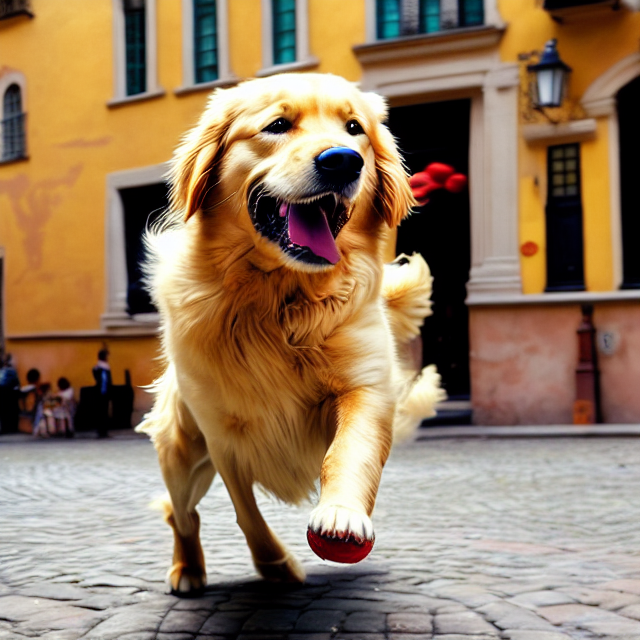

In [7]:
image

[PROMPT]:  A Golden Retriever, approximately 3 years old, with a thick, golden coat, playfully chases a bright red ball down a sun-drenched cobblestone street.  The dog's joyful expression is evident in its wide, expressive eyes and wagging tail; its body is full of dynamic energy, paws slightly raised mid-stride.  The dog is positioned slightly off-center, viewed from a low angle, emphasizing its playful energy. The cobblestones are warm, earthy tones, with patches of sunlight creating highlights and shadows.  Buildings flanking the street are painted in warm ochre and terracotta, creating a Mediterranean atmosphere.  The scene is bathed in the warm, bright light of a late afternoon sun, casting long shadows that stretch across the cobblestones.  The overall style is photorealistic, capturing the details of the dog's fur, the texture of the cobblestones, and the warm light.  The mood is one of carefree joy and vibrant energy, evocative of a classic, sun-drenched European street scene.

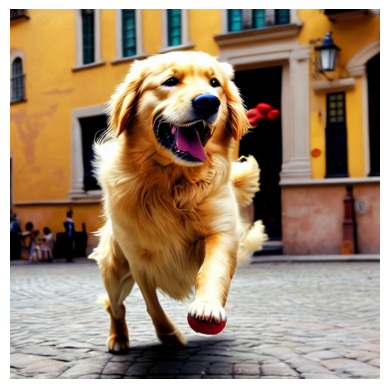

In [8]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [9]:
prompt2 = """Realistic digital painting of a girl in a serene forest, with detailed foliage and soft lighting."""
image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  Realistic digital painting of a girl in a serene forest, with detailed foliage and soft lighting.


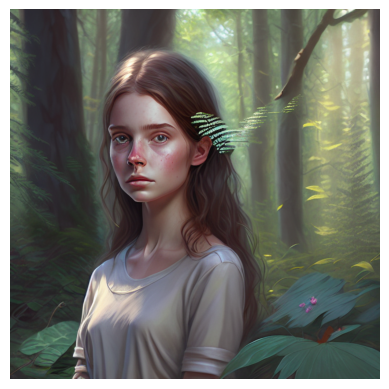

In [10]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [11]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [12]:
prompt = "Anime-style portrait of a cute girl with big eyes and colorful hair, set in a fantasy world."

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

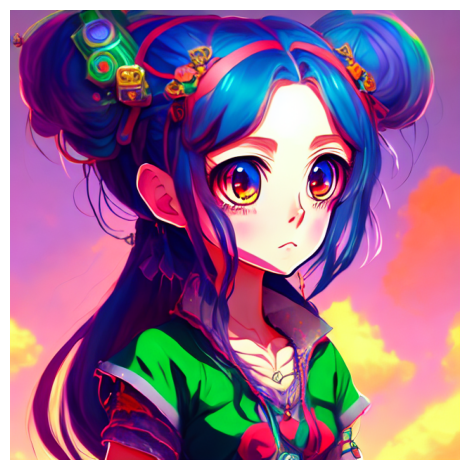

In [13]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

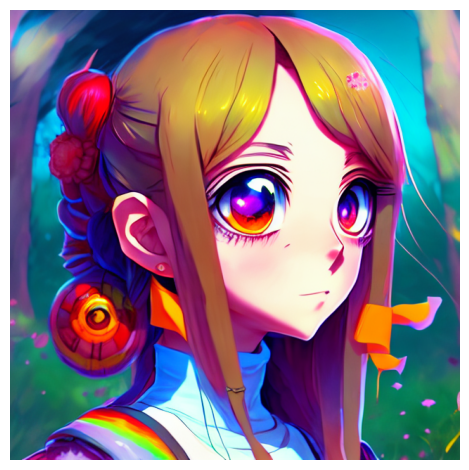

In [14]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

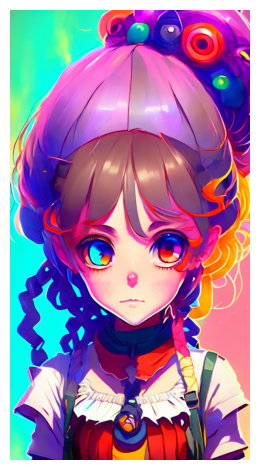

In [15]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

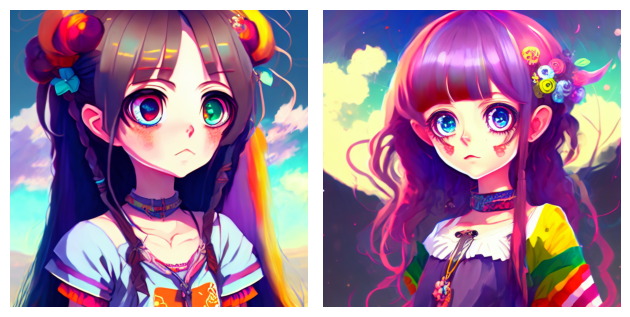

In [16]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

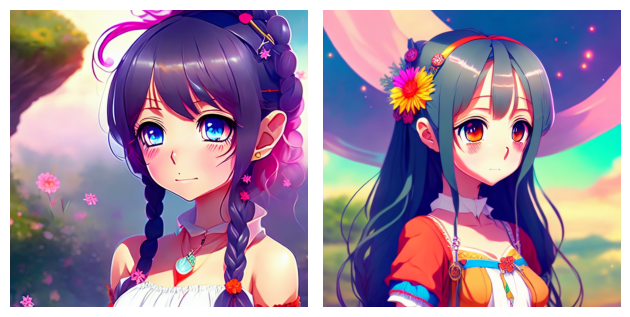

In [17]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

In [18]:
import json

# Set the notebook filename
notebook_path = "Text_to_Image_generation_with_LLM_with_hugging_face.ipynb"

# Load the notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    notebook = json.load(f)

# Check and remove metadata.widgets
if "metadata" in notebook and "widgets" in notebook["metadata"]:
    print("✅ 'metadata.widgets' found. Removing...")
    del notebook["metadata"]["widgets"]
else:
    print("ℹ️ No 'metadata.widgets' found. Notebook is already clean.")

# Save the cleaned notebook
with open(notebook_path, "w", encoding="utf-8") as f:
    json.dump(notebook, f, indent=2)

print("✅ Notebook cleaned successfully.")

FileNotFoundError: [Errno 2] No such file or directory: 'Text_to_Image_generation_with_LLM_with_hugging_face.ipynb'

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!ls "/content/drive/MyDrive/Colab Notebooks"

 1.Chroma_DB_demo.ipynb
'3 B.ipynb'
'Copy of Fine_tune_Llama_2.ipynb'
'Copy of Yes Bank Stock Closing Price Prediction.ipynb'
 fake-news-generator.ipynb
 Fine_tuned_classification.ipynb
'FineTune with Llama'
'Text_Summarizer_project (1).ipynb'
 Text_Summarizer_project.ipynb
 Text_to_Image_generation_with_LLM_with_hugging_face.ipynb
 Text_to_speech_generation_with_LLM_with_hugging_face.ipynb
 Untitled
 Untitled0.ipynb
'Untitled (1)'
 Untitled1.ipynb
'Untitled (2)'
 Untitled2.ipynb
'Untitled (3)'
 Untitled3.ipynb
'Untitled (4)'
 Untitled4.ipynb
 Untitled5.ipynb
'Yes Bank Stock Closing Price Prediction.ipynb'


In [21]:
!cp "/content/drive/MyDrive/Colab Notebooks/Text_to_Image_generation_with_LLM_with_hugging_face.ipynb" .

In [22]:
!ls

drive  sample_data  Text_to_Image_generation_with_LLM_with_hugging_face.ipynb


In [23]:
import json

notebook_path = "Text_to_Image_generation_with_LLM_with_hugging_face.ipynb"

with open(notebook_path, "r", encoding="utf-8") as f:
    notebook = json.load(f)

if "metadata" in notebook and "widgets" in notebook["metadata"]:
    print("✅ 'metadata.widgets' found. Removing...")
    del notebook["metadata"]["widgets"]
else:
    print("ℹ️ No 'metadata.widgets' found. Notebook is already clean.")

with open(notebook_path, "w", encoding="utf-8") as f:
    json.dump(notebook, f, indent=2)

print("✅ Notebook cleaned successfully.")

✅ 'metadata.widgets' found. Removing...
✅ Notebook cleaned successfully.


In [24]:
from google.colab import files
files.download("Text_to_Image_generation_with_LLM_with_hugging_face.ipynb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>